In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from random import randrange, uniform
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/8_urls.csv')
df.describe()
print((df['status'] == 0).sum())
print((df['status'] == 1).sum())
df = df.drop(columns=['url'])
df = df.dropna(subset=['domain_tld'])
df = pd.get_dummies(df, columns=["protocol", "www", "is_subdir"], drop_first=False)
df.describe()

4151
9729


,length,digits,dots,hyphens,slashes,commas,tlides,qms,ands,eqs,...,domain_special,domain_tld,domain_ratio,forms,iframes,missing_title,title_length,words,favicon,status
count,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,...,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000
mean,59.499424,5.343782,2.262358,0.877504,3.599294,0.009511,0.001297,0.053538,0.036821,0.134097,...,2.460801,2.388312,1.997943,0.857760,0.350122,0.031993,4.294711,5.399841,0.665081,0.700894
std,66.100304,14.096699,1.132555,2.160854,1.292566,0.336866,0.041567,0.255405,0.519018,2.107089,...,0.980394,3.256408,4.831048,2.031233,1.139659,0.175988,3.740951,2.736781,0.471979,0.457883
min,13.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000
50%,51.000000,2.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,5.000000,1.000000,1.000000
75%,84.000000,8.000000,3.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,0.820000,1.000000,1.000000,0.000000,5.000000,6.000000,1.000000,1.000000
max,3441.000000,772.000000,40.000000,88.000000,42.000000,20.000000,3.000000,8.000000,30.000000,131.000000,...,9.000000,18.000000,54.000000,120.000000,59.000000,1.000000,99.000000,40.000000,1.000000,1.000000


In [33]:
# df.to_csv('final.csv', index=False)

X = df.drop(['status'], axis=1)
y = df['status']



---



# After SMOTE

In [34]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
print((y_sm==1).sum())
print((y_sm==0).sum())

9727
9727


# KNN (SMOTE)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test_knn = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", cv_scores.mean())

knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

Cross-Validation Scores: [0.93768069 0.94410536 0.94667523 0.93958869 0.95115681]
Average Cross-Validation Accuracy: 0.943841358528833


# Random Forest (SMOTE)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test_rf = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# SVM (SMOTE)

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test_svm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

# XGBoost (SMOTE)

In [ ]:
!pip install xgboost==1.7.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

X_train, X_test, y_train, y_test_xgb = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

# LightGBM (SMOTE)

In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(random_state=42)

X_train, X_test, y_train, y_test_lbgm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 7799, number of negative: 7764
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1348
[LightGBM] [Info] Number of data points in the train set: 15563, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501124 -> initscore=0.004498
[LightGBM] [Info] Start training from score 0.004498


# CNN (SMOTE)

In [36]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from random import randrange, uniform
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_cnn = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

X_sm = X_sm.astype(np.float32)

X_sm = X_sm.values.reshape(-1, X_sm.shape[1], 1)


model = keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=X_train.shape[1:]),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

loss, accuracy_cnn = model.evaluate(X_test, y_test_cnn, verbose=0)

y_pred_probs = model.predict(X_test)

y_pred_cnn = (y_pred_probs > 0.5).astype(int)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8665 - loss: 0.3031 - val_accuracy: 0.9461 - val_loss: 0.1491
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9422 - loss: 0.1510 - val_accuracy: 0.9602 - val_loss: 0.1198
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9494 - loss: 0.1363 - val_accuracy: 0.9570 - val_loss: 0.1134
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9516 - loss: 0.1249 - val_accuracy: 0.9512 - val_loss: 0.1276
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9541 - loss: 0.1209 - val_accuracy: 0.9666 - val_loss: 0.0992
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9576 - loss: 0.1084 - val_accuracy: 0.9660 - val_loss: 0.0988
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9589 - loss: 0.1049 - val_accuracy: 0.9679 - val_loss: 0.0900
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9666 - loss: 0.0952 - val_accuracy: 0.9692 - val

# Performance Metrics

In [37]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model_names = ['KNN', 'Random Forest', 'SVM', 'XGBoost', 'LightGBM', 'CNN']

models = {
    "KNN": (y_test_knn, y_pred_knn),
    "RF": (y_test_rf, y_pred_rf),
    "SVM": (y_test_svm, y_pred_svm),
    "XGB": (y_test_xgb, y_pred_xgb),
    "LGBM": (y_test_lbgm, y_pred_lgbm),
    "CNN": (y_test_cnn, y_pred_cnn)
}

accuracy_scores, precision_scores, recall_scores, f1_scores, auc_roc_scores = [], [], [], [], []

for model_name, (y_test, y_pred) in models.items():
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

    if model_name == "CNN":
        auc_roc_scores.append(roc_auc_score(y_test, y_pred_probs))
    else:
        auc_roc_scores.append(roc_auc_score(y_test, y_pred))

results = {
    "accuracy": accuracy_scores,
    "precision": precision_scores,
    "recall": recall_scores,
    "f1": f1_scores,
    "auc_roc": auc_roc_scores
}

data = {
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores,
    'AUC-ROC': auc_roc_scores
}

df = pd.DataFrame(data)

display(df)

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,KNN,0.942945,0.965611,0.917531,0.940957,0.942719
1,Random Forest,0.974557,0.980557,0.967842,0.974158,0.974497
2,SVM,0.914418,0.938428,0.885373,0.911129,0.914159
3,XGBoost,0.976356,0.979123,0.973029,0.976067,0.976326
4,LightGBM,0.975585,0.980598,0.969917,0.975228,0.975534
5,CNN,0.969417,0.973312,0.964730,0.969002,0.994063


# Confusion Matrix & ROC Curve


## KNN

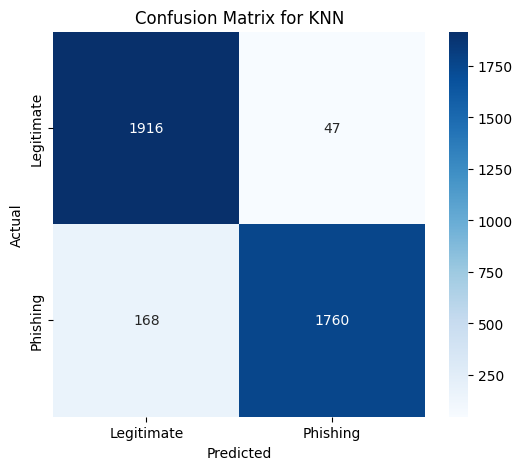

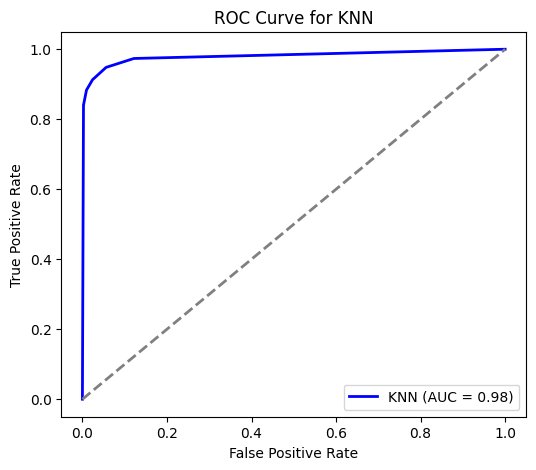

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

from sklearn.metrics import roc_curve, auc

# Get false positive rate, true positive rate, and thresholds
fpr, tpr, _ = roc_curve(y_test_knn, knn_classifier.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='KNN (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



## RF

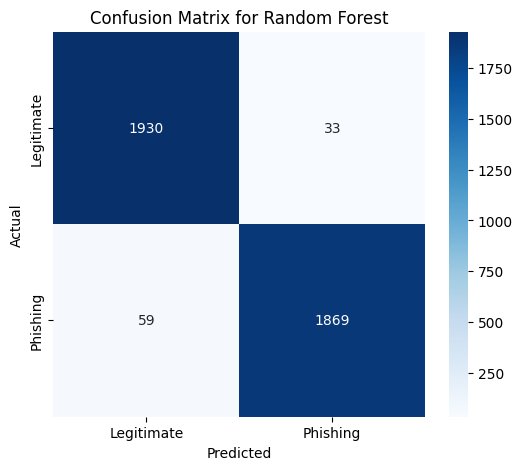

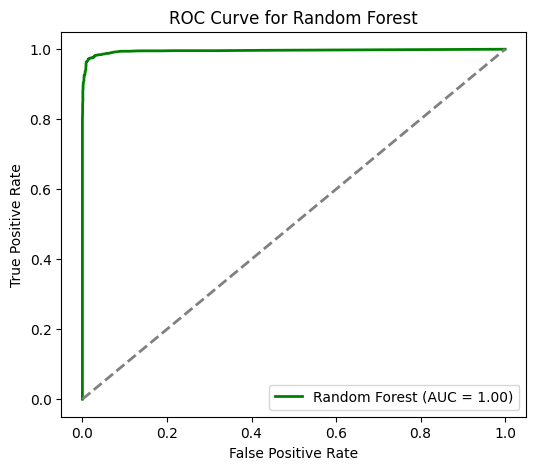

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Get false positive rate, true positive rate, and thresholds for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, rf.predict_proba(X_test)[:, 1])

# Calculate AUC for Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


## SVM

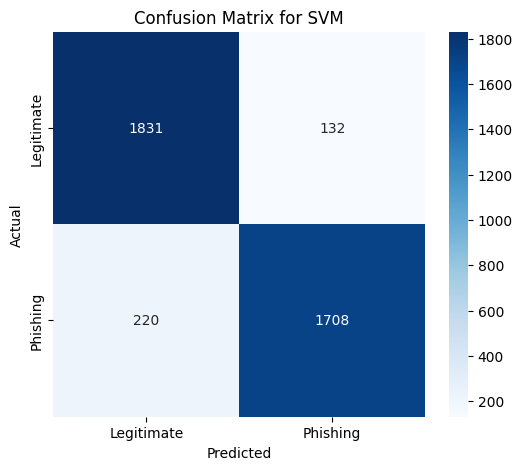

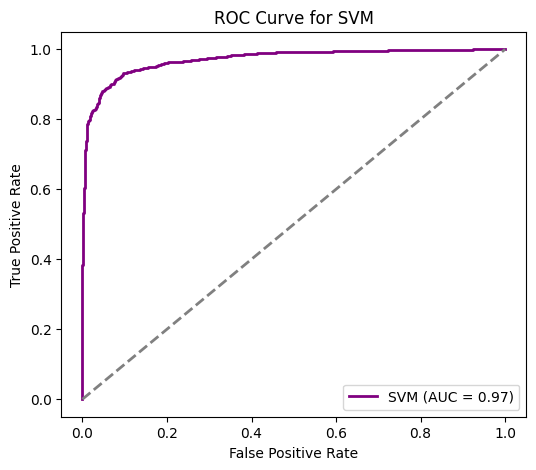

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for SVM
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Get false positive rate, true positive rate, and thresholds for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_svm, svm.decision_function(X_test))

# Calculate AUC for SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('ROC Curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


## XGBoost

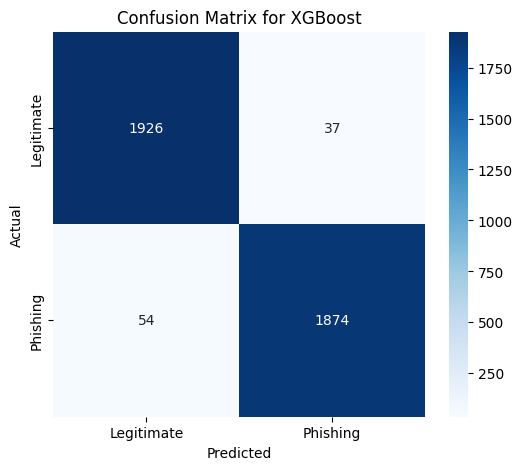

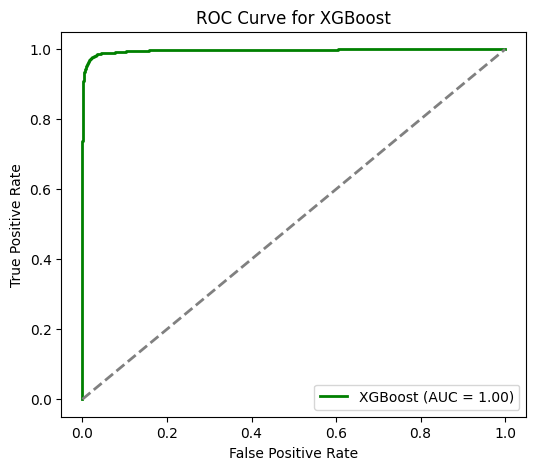

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate ROC curve for XGBoost
fpr, tpr, _ = roc_curve(y_test_xgb, xgb.predict_proba(X_test)[:, 1])  # XGBoost supports predict_proba

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='green', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random guess line
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


## LightGBM

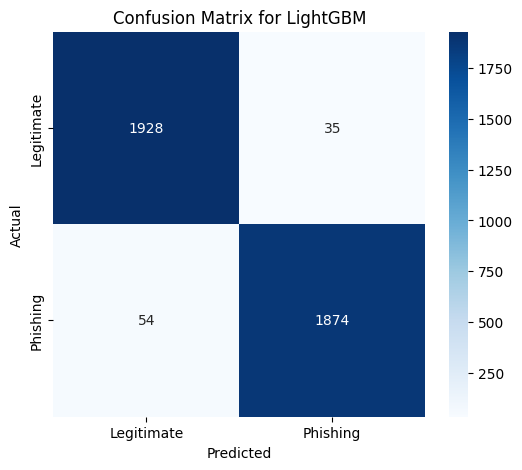

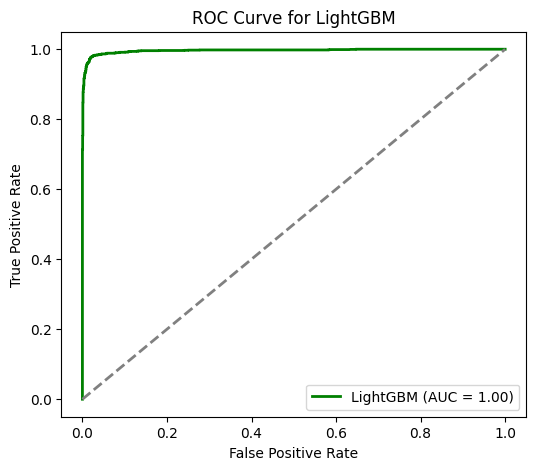

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred_lgbm = lgbm.predict(X_test)
y_pred_probs_lgbm = lgbm.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_lgbm = confusion_matrix(y_test_lbgm, y_pred_lgbm)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_lbgm, y_pred_probs_lgbm)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='green', lw=2, label='LightGBM (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('ROC Curve for LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


## CNN

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


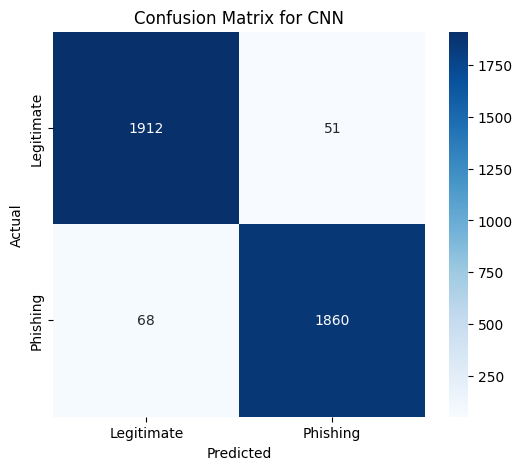

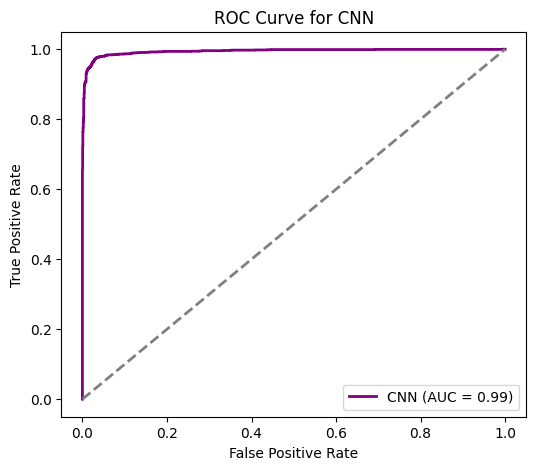

In [38]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred_probs_cnn = model.predict(X_test)  # Get predicted probabilities
y_pred_cnn = (y_pred_probs_cnn > 0.5).astype(int).flatten()  # Convert to binary predictions

# Confusion Matrix
cm_cnn = confusion_matrix(y_test_cnn, y_pred_cnn)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_cnn, y_pred_probs_cnn)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='purple', lw=2, label='CNN (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('ROC Curve for CNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

